<a href="https://colab.research.google.com/github/KZoc/Alura-Challenge_1_DataScience/blob/main/Notebooks/Challenge_Data_Science_Alura_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=green size=9>Análise de Dados - Churn Clientes Alura Voz</font>


##<font color=green> Dicionário de dados - Semana 1</font>

- **customerID:** número de identificação único de cada cliente
- **Churn:** se o cliente deixou ou não a empresa
- **gender:** gênero (masculino e feminino)
- **SeniorCitizen:** informação sobre um cliente ter ou não idade igual ou maior que 65 anos
- **Partner:** se o cliente possui ou não é parceiro ou parceiro
- **Dependents:** se o cliente possui ou não dependentes
- **tenure:** meses de contrato do cliente
- **PhoneService:** assinatura de serviço telefônico
- **MultipleLines:** assisnatura de mais de uma linha de telefone
- **InternetService:** assinatura de um provedor internet
- **OnlineSecurity:** assinatura adicional de segurança online
- **OnlineBackup:** assinatura adicional de backup online
- **DeviceProtection:** assinatura adicional de proteção no dispositivo
- **TechSupport:** assinatura adicional de suporte técnico, menos tempo de espera
- **StreamingTV:** assinatura de TV a cabo
- **StreamingMovies:** assinatura de streaming de filmes
- **Contract:** tipo de contrato
- **PaperlessBilling:** se o cliente prefere receber online uma fatura
- **PaymentMethod:** forma de pagamento
- **Charges.Monthly:** total de todos os serviços do cliente por mês
- **Charges.Total:** gasto total pelo cliente


# <font color=green>Importando bibliotecas e carregando DataFrame</font>
## (Importing libraries and loading DataFrame)

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import json

In [76]:
# 
pd.set_option('display.max_columns', 30)

In [77]:
df_0 = pd.read_json('Telco-Customer-Churn.json')
df_0.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# <font color=green>Tratamento dos dados e Organização do DataFrame</font>
## (Data handling and Organization of the DataFrame)

## <font color=green>Análise Básica Preliminar dos Dados</font>

In [78]:
df_0.count()    #Verificando número de linhas no dataframe

customerID    7267
Churn         7267
customer      7267
phone         7267
internet      7267
account       7267
dtype: int64

In [79]:
df_0.Churn.value_counts()     #Verificando quantidades de clientes desistentes e que permanecem.  Obs. No resultado podemos ver que existem 224 clientes não categorizados quanto a evasão.

No     5174
Yes    1869
        224
Name: Churn, dtype: int64

In [80]:
df_0    #Nota-se que existem dados aninhados dentro de algumas colunas, o que impossibilita a análise na forma em que está. Para resolver vou separar esses dados em novas colunas

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [81]:
with open('Telco-Customer-Churn.json') as data_file:    #Aqui normalizei os dados json que estavam aninhados nas colunas, desta forma obtive a separação deles em novas colunas
  chaves = json.load(data_file)
  df_normalizado = pd.json_normalize(chaves)

df_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## <font color=green>Traduzindo as Colunas</font>

In [82]:
colunas = list(df_normalizado.columns)    #Obtive a lista com os nomes das colunas, para a seguir poder traduzí-las
colunas

['customerID',
 'Churn',
 'customer.gender',
 'customer.SeniorCitizen',
 'customer.Partner',
 'customer.Dependents',
 'customer.tenure',
 'phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies',
 'account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total']

In [83]:
colunas = {'customerID':'ID_Usuário',
 'Churn':'Cancelamento',
 'customer.gender':'Gênero',
 'customer.SeniorCitizen':'Mais_de_65_anos',
 'customer.Partner':'Cônjuje',
 'customer.Dependents':'Dependentes',
 'customer.tenure':'Meses_de_Contrato',
 'phone.PhoneService':'Serviço_Telefônico',
 'phone.MultipleLines':'Multiplas_Linhas',
 'internet.InternetService':'Serviço_de_Internet',
 'internet.OnlineSecurity':'Segurança_Online',
 'internet.OnlineBackup':'Serviço_Backup_Online',
 'internet.DeviceProtection':'Proteção_de_Dispositivo',
 'internet.TechSupport':'Suporte_Técnico',
 'internet.StreamingTV':'Assina_TV',
 'internet.StreamingMovies':'Assina_Filmes',
 'account.Contract':'Tipo_de_Contrato',
 'account.PaperlessBilling':'Fatura_Online',
 'account.PaymentMethod':'Forma_de_Pagamento',
 'account.Charges.Monthly':'Custo_Mensal_de_Serviços',
 'account.Charges.Total':'Total_Acumulado'}

In [84]:
df_traduzido = df_normalizado.rename(columns = colunas)   #Aqui faço a mudança dos nomes das colunas com base no dicionário criado acima

In [85]:
df_traduzido.head(25)

,ID_Usuário,Cancelamento,Gênero,Mais_de_65_anos,Cônjuje,Dependentes,Meses_de_Contrato,Serviço_Telefônico,Multiplas_Linhas,Serviço_de_Internet,Segurança_Online,Serviço_Backup_Online,Proteção_de_Dispositivo,Suporte_Técnico,Assina_TV,Assina_Filmes,Tipo_de_Contrato,Fatura_Online,Forma_de_Pagamento,Custo_Mensal_de_Serviços,Total_Acumulado
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


## <font color=green>Definindo Tipo das Variáveis</font>

In [86]:
colunas_traduz = list(df_traduzido.columns)    #Obtive a lista com os nomes das colunas e criei manualmente a lista abaixo definindo as variáveis
colunas_traduz 

['ID_Usuário',
 'Cancelamento',
 'Gênero',
 'Mais_de_65_anos',
 'Cônjuje',
 'Dependentes',
 'Meses_de_Contrato',
 'Serviço_Telefônico',
 'Multiplas_Linhas',
 'Serviço_de_Internet',
 'Segurança_Online',
 'Serviço_Backup_Online',
 'Proteção_de_Dispositivo',
 'Suporte_Técnico',
 'Assina_TV',
 'Assina_Filmes',
 'Tipo_de_Contrato',
 'Fatura_Online',
 'Forma_de_Pagamento',
 'Custo_Mensal_de_Serviços',
 'Total_Acumulado']

<font color=green>Definindo Tipo das Variáveis</font>
 - ID_Usuário = Qualitativa Nominal
 - Cancelamento = Qualitativa Nominal
 - Gênero = Qualitativa Nominal
 - Mais_de_65_anos = Qualitativa Ordinal
 - Cônjuje = Qualitativa Nominal
 - Dependentes = Qualitativa Nominal
 - Meses_de_Contrato = Quantitativa Discreta
 - Serviço_Telefônico = Qualitativa Nominal
 - Multiplas_Linhas = Qualitativa Nominal
 - Serviço_de_Internet = Qualitativa Nominal
 - Segurança_Online = Qualitativa Nominal
 - Serviço_Backup_Online = Qualitativa Nominal
 - Proteção_de_Dispositivo = Qualitativa Nominal
 - Suporte_Técnico = Qualitativa Nominal
 - Assina_TV = Qualitativa Nominal
 - Assina_Filmes = Qualitativa Nominal
 - Tipo_de_Contrato = Qualitativa Ordinal
 - Fatura_Online = Qualitativa Nominal
 - Forma_de_Pagamento = Qualitativa Nominal
 - Custo_Mensal_de_Serviços = Quantitativa Contínua
 - Total_Acumulado = Quantitativa Contínua
 

In [87]:
df_traduzido.info()   #Verificar o por que 'Total_Acumulado' está como object, se na verdade deve ser float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_Usuário                7267 non-null   object 
 1   Cancelamento              7267 non-null   object 
 2   Gênero                    7267 non-null   object 
 3   Mais_de_65_anos           7267 non-null   int64  
 4   Cônjuje                   7267 non-null   object 
 5   Dependentes               7267 non-null   object 
 6   Meses_de_Contrato         7267 non-null   int64  
 7   Serviço_Telefônico        7267 non-null   object 
 8   Multiplas_Linhas          7267 non-null   object 
 9   Serviço_de_Internet       7267 non-null   object 
 10  Segurança_Online          7267 non-null   object 
 11  Serviço_Backup_Online     7267 non-null   object 
 12  Proteção_de_Dispositivo   7267 non-null   object 
 13  Suporte_Técnico           7267 non-null   object 
 14  Assina_T

## <font color=green>Verificando e Corrigindo Inconsistências</font>

In [88]:
# Farei uma varredura nas colunas para procurar inconsistências

print('\033[1;4;33m-----  Quantidade Total de Usuários = {}\033[\n\n'.format(len(df_traduzido)))

for columns in df_traduzido:
  analise_1 = df_traduzido[columns].describe()
  analise_2 = df_traduzido[columns].value_counts()
  contagem_1 = pd.value_counts(df_traduzido[columns].isnull()) # Verifica e conta quantos campos são NaN (NULOS)
  contagem_2 = pd.value_counts(df_traduzido[columns] == '')  # Verifica e conta quantos campos são VAZIOS
  print('\033[1;4;33mAnálise Coluna:  {} \033['.format(columns))
  print('\033[2;4;32m\n-----  Análisando com DESCRIBE:\033[\n{}'.format(analise_1))
  print('\033[2;4;32m\n-----  Análisando  com VALUE_COUNTS:\033[\n{}'.format(analise_2))
  print('\033[2;4;32m\n-----  Análisando Campos NULOS = \033[{}'.format(7267 - contagem_1.loc[False]))
  print('\033[2;4;32m\n-----  Análisando Campos VAZIOS = \033[{}'.format(7267 - contagem_2.loc[False]))
  print('\n'+'  -----  <>' * 15 + '\n')

-----  Quantidade Total de Usuários = 7267[


Análise Coluna:  ID_Usuário [

-----  Análisando com DESCRIBE:[
count           7267
unique          7267
top       0002-ORFBO
freq               1
Name: ID_Usuário, dtype: object

-----  Análisando  com VALUE_COUNTS:[
0002-ORFBO    1
6614-VBEGU    1
6637-KYRCV    1
6635-MYYYZ    1
6635-CPNUN    1
             ..
3374-TTZTK    1
3374-PZLXD    1
3374-LXDEV    1
3373-YZZYM    1
9995-HOTOH    1
Name: ID_Usuário, Length: 7267, dtype: int64

-----  Análisando Campos NULOS = [0

-----  Análisando Campos VAZIOS = [0

  -----  <>  -----  <>  -----  <>  -----  <>  -----  <>  -----  <>  -----  <>  -----  <>  -----  <>  -----  <>  -----  <>  -----  <>  -----  <>  -----  <>  -----  <>

Análise Coluna:  Cancelamento [

-----  Análisando com DESCRIBE:[
count     7267
unique       3
top         No
freq      5174
Name: Cancelamento, dtype: object

-----  Análisando  com VALUE_COUNTS:[
No     5174
Yes    1869
        224
Name: Cancelamento, dtype: 

### <font color=green>Observações da análise acima:</font>

###. <font color=yellow>Cancelamento = Possui 224 células vazias. Vou excluir e guardar em outro dataframe.
###. <font color=yellow>Mais_de_65_anos = Considerar onde é 0 = NO e onde é 1 = YES 
###. <font color=yellow>Multiplas_Linhas = Verificar se, caso NÃO tenha serviço de telefone o campo aqui não pode ser YES/True.
###. <font color=yellow>Acho importante verificar se não há incoerências entre as respostas das seguintes colunas:
- Segurança_Online
- Serviço_Backup_Online
- Proteção_de_Dispositivo
- Suporte_Técnico
- Assina_TV
- Assina_Filmes
- No caso das colunas acima, se elas tiverem o conteúdo 'No internet service', então é importante conferir se na coluna 'Serviço_de_Internet' ela está com 'No', caso contrário há uma informação conflitante.</font>

###. <font color=yellow>Tipo_de_Contrato = Alterar as células para o seguinte:
- Month_to_month -> 0
- One_year -> 1
- Two_year -> 2
- Assim poderei ordenar essa categoria depois, se for necessário.</font>

###. Total_Acumulado = Não têm todas as células preenchidas com números e, também, está como tipo 'object', mas o certo é ser 'float64' por conter apenas números</font>

###. Acho interessante criar mais uma coluna com a quantidade de serviços contratados</font>

### Continuação na Verificação de Inconsistências e Correção

In [89]:
df_corrigido = df_traduzido

In [90]:
df_corrigido['Total_Acumulado'] = df_corrigido['Total_Acumulado'].apply(lambda x: str(x).replace(',','.'))  # Substituindo possiveis virgulas por ponto

In [91]:
df_corrigido['Total_Acumulado'] = df_corrigido['Total_Acumulado'].apply(lambda x: str(x).replace(' ','0')) # Substituindo espaços vazios por 0

In [92]:
df_corrigido['Total_Acumulado'] = df_corrigido['Total_Acumulado'].astype('float64')

In [93]:
df_corrigido['Total_Acumulado'].value_counts()

0.00       11
20.20      11
19.75       9
19.55       9
19.90       9
           ..
272.00      1
1426.45     1
371.60      1
6786.40     1
3707.60     1
Name: Total_Acumulado, Length: 6531, dtype: int64

In [94]:
df_corrigido['Total_Acumulado'].describe()    # Podemos ver que o o problema com os dados na coluna foram resolvidos

count    7267.000000
mean     2277.182035
std      2268.648587
min         0.000000
25%       396.200000
50%      1389.200000
75%      3778.525000
max      8684.800000
Name: Total_Acumulado, dtype: float64

#### Substituição dos valores na coluna 'Mais_de_65_anos', conforme observações feitas mais acima

In [95]:
idade = {0: 'No', 1: 'Yes'}

In [96]:
df_corrigido['Mais_de_65_anos'].replace(idade, inplace = True)

In [97]:
df_corrigido['Mais_de_65_anos'].value_counts() # Conferindo se deu certo - 0  =  6085 |  1  =  1182
# Deu certo

No     6085
Yes    1182
Name: Mais_de_65_anos, dtype: int64

#### Fazendo checagem da coluna Multiplas_Linhas com a coluna Serviço_Telefônico.
- Aqui devemos verificar o seguinte: SE Multiplas_Linhas = Yes E Serviço_Telefônico = No, então temos um problema de incoerência de dados.

In [98]:
teste = (df_corrigido['Serviço_Telefônico'] == 'No') & (df_corrigido['Multiplas_Linhas'] == 'Yes')

In [99]:
teste.value_counts() # O resultado abaixo nos mostra que está tudo certo, ou seja, NÃO há incoerência entre as respostas das duas colunas.

False    7267
dtype: int64

#### Verificação da coerência entre os dados das várias colunas em relação a coluna 'Serviço_de_Internet':
- Agora vamos verificar através de um laço for, a coerência entre os dados das várias colunas em relação a coluna 'Serviço_de_Internet', conforme as observações feitas mais acima.

In [100]:
col_verif = ['Segurança_Online', 'Serviço_Backup_Online', 'Proteção_de_Dispositivo', 'Suporte_Técnico', 'Assina_TV', 'Assina_Filmes']   # Crie uma lista com as colunas que deverão ser comparadas com a coluna 'Serviço_de_Internet'

In [101]:
for x in col_verif:
  compara = (df_corrigido['Serviço_de_Internet'] == 'No') & (df_corrigido[x] == 'Yes')   # Faço a comparação entre as colunas 
  contagem = compara.value_counts()   # Faço a contagem apenas das respostas True, que significa, o número de incoerência entre as colunas
  print('\033[2;4;32mA comparação da coluna {} resultou em:\n {} \033[\n'.format(x, contagem))
  print('-'*80)

A comparação da coluna Segurança_Online resultou em:
 False    7267
dtype: int64 [

--------------------------------------------------------------------------------
A comparação da coluna Serviço_Backup_Online resultou em:
 False    7267
dtype: int64 [

--------------------------------------------------------------------------------
A comparação da coluna Proteção_de_Dispositivo resultou em:
 False    7267
dtype: int64 [

--------------------------------------------------------------------------------
A comparação da coluna Suporte_Técnico resultou em:
 False    7267
dtype: int64 [

--------------------------------------------------------------------------------
A comparação da coluna Assina_TV resultou em:
 False    7267
dtype: int64 [

--------------------------------------------------------------------------------
A comparação da coluna Assina_Filmes resultou em:
 False    7267
dtype: int64 [

--------------------------------------------------------------------------------


In [102]:
# A análise acima mostra que está tudo certo.

#### Alterando as células da coluna 'Tipo_de_Contrato' da seguinte forma:
- Month_to_month -> 0
- One year -> 1
- Two year -> 2

In [103]:
alteracao = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}

In [104]:
df_corrigido['Tipo_de_Contrato'].replace(alteracao, inplace = True)

In [105]:
df_corrigido['Tipo_de_Contrato'].value_counts()   # Month-to-month    4005 | Two year          1743 | One year          1519
# A substituição deu certo.

0    4005
2    1743
1    1519
Name: Tipo_de_Contrato, dtype: int64

# <font color=green>Adicionando Coluna 'Custo_Diario' na posição 18</font>

In [106]:
df_corrigido.head()

,ID_Usuário,Cancelamento,Gênero,Mais_de_65_anos,Cônjuje,Dependentes,Meses_de_Contrato,Serviço_Telefônico,Multiplas_Linhas,Serviço_de_Internet,Segurança_Online,Serviço_Backup_Online,Proteção_de_Dispositivo,Suporte_Técnico,Assina_TV,Assina_Filmes,Tipo_de_Contrato,Fatura_Online,Forma_de_Pagamento,Custo_Mensal_de_Serviços,Total_Acumulado
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,1,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,0,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,0,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,0,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,0,Yes,Mailed check,83.9,267.40


In [107]:
# Nova coluna a ser adicionada
colun_18 = df_corrigido['Custo_Mensal_de_Serviços'] / 30
  
# Inserindo a coluna na posição 18
df_corrigido.insert(loc = 17,
          column = 'Custo_Diário',
          value = colun_18.round(2))

In [108]:
df_corrigido.head()

,ID_Usuário,Cancelamento,Gênero,Mais_de_65_anos,Cônjuje,Dependentes,Meses_de_Contrato,Serviço_Telefônico,Multiplas_Linhas,Serviço_de_Internet,Segurança_Online,Serviço_Backup_Online,Proteção_de_Dispositivo,Suporte_Técnico,Assina_TV,Assina_Filmes,Tipo_de_Contrato,Custo_Diário,Fatura_Online,Forma_de_Pagamento,Custo_Mensal_de_Serviços,Total_Acumulado
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,1,2.19,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,0,2.00,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,0,2.46,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,0,3.27,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,0,2.80,Yes,Mailed check,83.9,267.40


# <font color=green>Adicionando Coluna 'Serviços_Contratados' na posição 7</font>

In [109]:
# Criando uma lista com as qtdes de serviços contratados por cada cliente

In [110]:
nome_colunas = list(df_corrigido.columns) #  Pegando o nome das colunas para criar uma lista com as colunas especificas de serviços que devem ser analisadas para a contagem
nome_colunas

['ID_Usuário',
 'Cancelamento',
 'Gênero',
 'Mais_de_65_anos',
 'Cônjuje',
 'Dependentes',
 'Meses_de_Contrato',
 'Serviço_Telefônico',
 'Multiplas_Linhas',
 'Serviço_de_Internet',
 'Segurança_Online',
 'Serviço_Backup_Online',
 'Proteção_de_Dispositivo',
 'Suporte_Técnico',
 'Assina_TV',
 'Assina_Filmes',
 'Tipo_de_Contrato',
 'Custo_Diário',
 'Fatura_Online',
 'Forma_de_Pagamento',
 'Custo_Mensal_de_Serviços',
 'Total_Acumulado']

In [111]:
# Lista contendo APENAS as colunas que são serviços.

nome_colunas = ['Serviço_Telefônico',
 'Multiplas_Linhas',
 'Serviço_de_Internet',
 'Segurança_Online',
 'Serviço_Backup_Online',
 'Proteção_de_Dispositivo',
 'Suporte_Técnico',
 'Assina_TV',
 'Assina_Filmes']

In [112]:
lista_soma = [0] * df_corrigido.shape[0] # Criei uma lista de 0 com a qtde de elementos do nosso DT
for x in nome_colunas:    # Para cada string na lista 'nome_colunas' fará o que está abaixo:
  lista = []  # Cria uma vazia
  for y in df_corrigido[x]: # Para cada linha da coluna x (item da lista 'nome_colunas'), faz a comparação abaixo e adiciona 1 ou 0 em 'lista'.
    if (y != 'No') & (y != 'No internet service') & (y != 'No phone service'):
      lista.append(1)
    else:
      lista.append(0)
  lista_soma = list(map(lambda v1, v2: v1 + v2, lista, lista_soma))   # A função map faz a soma dos elementos de 'lista_soma' e 'lista' através de uma função lambda como parâmetro

In [113]:
lista_soma = pd.Series(lista_soma)
lista_soma.value_counts()

1    1306
4     994
5     950
6     929
2     896
3     871
7     699
8     408
9     214
dtype: int64

In [114]:
df_corrigido.insert(loc = 7, column = 'Serviços_Contratados', value = lista_soma)

In [115]:
df_corrigido.head()

,ID_Usuário,Cancelamento,Gênero,Mais_de_65_anos,Cônjuje,Dependentes,Meses_de_Contrato,Serviços_Contratados,Serviço_Telefônico,Multiplas_Linhas,Serviço_de_Internet,Segurança_Online,Serviço_Backup_Online,Proteção_de_Dispositivo,Suporte_Técnico,Assina_TV,Assina_Filmes,Tipo_de_Contrato,Custo_Diário,Fatura_Online,Forma_de_Pagamento,Custo_Mensal_de_Serviços,Total_Acumulado
0,0002-ORFBO,No,Female,No,Yes,Yes,9,5,Yes,No,DSL,No,Yes,No,Yes,Yes,No,1,2.19,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,4,Yes,Yes,DSL,No,No,No,No,No,Yes,0,2.00,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,3,Yes,No,Fiber optic,No,No,Yes,No,No,No,0,2.46,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,6,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,0,3.27,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,4,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,0,2.80,Yes,Mailed check,83.9,267.40


# <font color=green>Separando os Clientes (Permanecem e Cancelaram)</font>

In [116]:
df_Cancelamento_vazio = df_corrigido[~((df_corrigido.Cancelamento == 'Yes') | (df_corrigido.Cancelamento == 'No'))] # Criando um DF só com os usuários com Churn vazio

In [117]:
df_Cancelamento_vazio

,ID_Usuário,Cancelamento,Gênero,Mais_de_65_anos,Cônjuje,Dependentes,Meses_de_Contrato,Serviços_Contratados,Serviço_Telefônico,Multiplas_Linhas,Serviço_de_Internet,Segurança_Online,Serviço_Backup_Online,Proteção_de_Dispositivo,Suporte_Técnico,Assina_TV,Assina_Filmes,Tipo_de_Contrato,Custo_Diário,Fatura_Online,Forma_de_Pagamento,Custo_Mensal_de_Serviços,Total_Acumulado
30,0047-ZHDTW,,Female,No,No,No,11,4,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,0,2.63,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,No,No,No,71,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2,0.66,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,No,No,No,29,5,Yes,No,DSL,Yes,Yes,No,Yes,No,No,1,1.96,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,Yes,No,No,5,5,Yes,No,DSL,Yes,Yes,No,Yes,No,No,0,2.00,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,Yes,Yes,No,65,7,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,1,3.44,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,No,No,No,14,4,Yes,Yes,DSL,No,Yes,No,No,No,No,1,1.81,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,No,Yes,No,49,3,No,No phone service,DSL,Yes,No,No,No,Yes,No,0,1.36,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,No,No,No,9,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,0,2.54,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,No,Yes,Yes,67,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2,0.64,Yes,Bank transfer (automatic),19.25,1372.90


In [118]:
df_corrigido = df_corrigido[((df_corrigido.Cancelamento == 'Yes') | (df_corrigido.Cancelamento == 'No'))]     #Removendo os usuário com Churn vazio

In [119]:
df_corrigido

,ID_Usuário,Cancelamento,Gênero,Mais_de_65_anos,Cônjuje,Dependentes,Meses_de_Contrato,Serviços_Contratados,Serviço_Telefônico,Multiplas_Linhas,Serviço_de_Internet,Segurança_Online,Serviço_Backup_Online,Proteção_de_Dispositivo,Suporte_Técnico,Assina_TV,Assina_Filmes,Tipo_de_Contrato,Custo_Diário,Fatura_Online,Forma_de_Pagamento,Custo_Mensal_de_Serviços,Total_Acumulado
0,0002-ORFBO,No,Female,No,Yes,Yes,9,5,Yes,No,DSL,No,Yes,No,Yes,Yes,No,1,2.19,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,No,No,No,9,4,Yes,Yes,DSL,No,No,No,No,No,Yes,0,2.00,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,3,Yes,No,Fiber optic,No,No,Yes,No,No,No,0,2.46,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,6,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,0,3.27,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,4,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,0,2.80,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,No,No,No,13,4,Yes,No,DSL,Yes,No,No,Yes,No,No,1,1.84,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,No,Yes,No,22,4,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,0,2.84,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,No,No,No,2,3,Yes,No,DSL,No,Yes,No,No,No,No,0,1.68,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,No,Yes,Yes,67,6,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,2,2.26,No,Mailed check,67.85,4627.65


In [120]:
# Salvando o DataFrame com os clientes que estão com o campo 'Churn' vazio.
df_Cancelamento_vazio.to_csv('Clientes_com_Churn_Vazio.csv', index = False)

In [121]:
df_grupo_status = df_corrigido.groupby(['Cancelamento'])

In [122]:
df_Cancelaram = df_corrigido[df_corrigido['Cancelamento'] == 'Yes'].reset_index()   # Criei um dataframe contendo apenas clientes que Cancelaram (Churn = Yes)
del df_Cancelaram['index']    # Por usar o comando reset_index acima cria-se uma coluna com os números antigos do indice, porém não serão necessários, por isso, aqui deleto ela
df_Cancelaram.count()

ID_Usuário                  1869
Cancelamento                1869
Gênero                      1869
Mais_de_65_anos             1869
Cônjuje                     1869
Dependentes                 1869
Meses_de_Contrato           1869
Serviços_Contratados        1869
Serviço_Telefônico          1869
Multiplas_Linhas            1869
Serviço_de_Internet         1869
Segurança_Online            1869
Serviço_Backup_Online       1869
Proteção_de_Dispositivo     1869
Suporte_Técnico             1869
Assina_TV                   1869
Assina_Filmes               1869
Tipo_de_Contrato            1869
Custo_Diário                1869
Fatura_Online               1869
Forma_de_Pagamento          1869
Custo_Mensal_de_Serviços    1869
Total_Acumulado             1869
dtype: int64

In [123]:
df_Permanecem = df_corrigido[df_corrigido['Cancelamento'] == 'No'].reset_index()     #Criei um dataframe contendo apenas clientes que Permaneceram (Churn = No)
del df_Permanecem['index']    # Por usar o comando reset_index acima cria-se uma coluna com os números antigos do indice, porém não serão necessários, por isso, aqui deleto ela
df_Permanecem.count()

ID_Usuário                  5174
Cancelamento                5174
Gênero                      5174
Mais_de_65_anos             5174
Cônjuje                     5174
Dependentes                 5174
Meses_de_Contrato           5174
Serviços_Contratados        5174
Serviço_Telefônico          5174
Multiplas_Linhas            5174
Serviço_de_Internet         5174
Segurança_Online            5174
Serviço_Backup_Online       5174
Proteção_de_Dispositivo     5174
Suporte_Técnico             5174
Assina_TV                   5174
Assina_Filmes               5174
Tipo_de_Contrato            5174
Custo_Diário                5174
Fatura_Online               5174
Forma_de_Pagamento          5174
Custo_Mensal_de_Serviços    5174
Total_Acumulado             5174
dtype: int64

# <font color=green>Análise Exploratória do Grupo dos que CANCELARAM</font>

In [124]:
df_grupo_status.get_group('Yes')

,ID_Usuário,Cancelamento,Gênero,Mais_de_65_anos,Cônjuje,Dependentes,Meses_de_Contrato,Serviços_Contratados,Serviço_Telefônico,Multiplas_Linhas,Serviço_de_Internet,Segurança_Online,Serviço_Backup_Online,Proteção_de_Dispositivo,Suporte_Técnico,Assina_TV,Assina_Filmes,Tipo_de_Contrato,Custo_Diário,Fatura_Online,Forma_de_Pagamento,Custo_Mensal_de_Serviços,Total_Acumulado
2,0004-TLHLJ,Yes,Male,No,No,No,4,3,Yes,No,Fiber optic,No,No,Yes,No,No,No,0,2.46,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,6,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,0,3.27,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,4,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,0,2.80,Yes,Mailed check,83.90,267.40
18,0022-TCJCI,Yes,Male,Yes,No,No,45,5,Yes,No,DSL,Yes,No,Yes,No,No,Yes,1,2.09,No,Credit card (automatic),62.70,2791.50
19,0023-HGHWL,Yes,Male,Yes,No,No,1,1,No,No phone service,DSL,No,No,No,No,No,No,0,0.84,Yes,Electronic check,25.10,25.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,Yes,Male,Yes,No,No,21,5,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,0,3.23,Yes,Bank transfer (automatic),96.80,2030.30
7246,9965-YOKZB,Yes,Male,Yes,No,No,9,4,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,0,2.80,Yes,Electronic check,83.85,790.15
7260,9985-MWVIX,Yes,Female,No,No,No,1,2,Yes,No,Fiber optic,No,No,No,No,No,No,0,2.34,Yes,Mailed check,70.15,70.15
7261,9986-BONCE,Yes,Female,No,No,No,4,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,0,0.70,No,Bank transfer (automatic),20.95,85.50


In [125]:
tabela_frequencia_1 = pd.crosstab(df_grupo_status.get_group('Yes')['Gênero'], df_grupo_status.get_group('Yes')['Mais_de_65_anos'])

In [126]:
tabela_frequencia_1

Mais_de_65_anos,No,Yes
Gênero,,
Female,699,240
Male,694,236


In [127]:
tabela_porcentagem_1 = pd.crosstab(df_grupo_status.get_group('Yes')['Gênero'], df_grupo_status.get_group('Yes')['Mais_de_65_anos'], normalize= True).round(3)

In [128]:
tabela_porcentagem_1

Mais_de_65_anos,No,Yes
Gênero,,
Female,0.374,0.128
Male,0.371,0.126


<font color=green>Observações: Com base nas duas tabelas vemos que aproximadamente 74% estão abaixo dos 65 anos e a distribuição entre homens e mulheres é praticamente a mesma.</font>

###<font color=green>Analisando Graficamente</font>

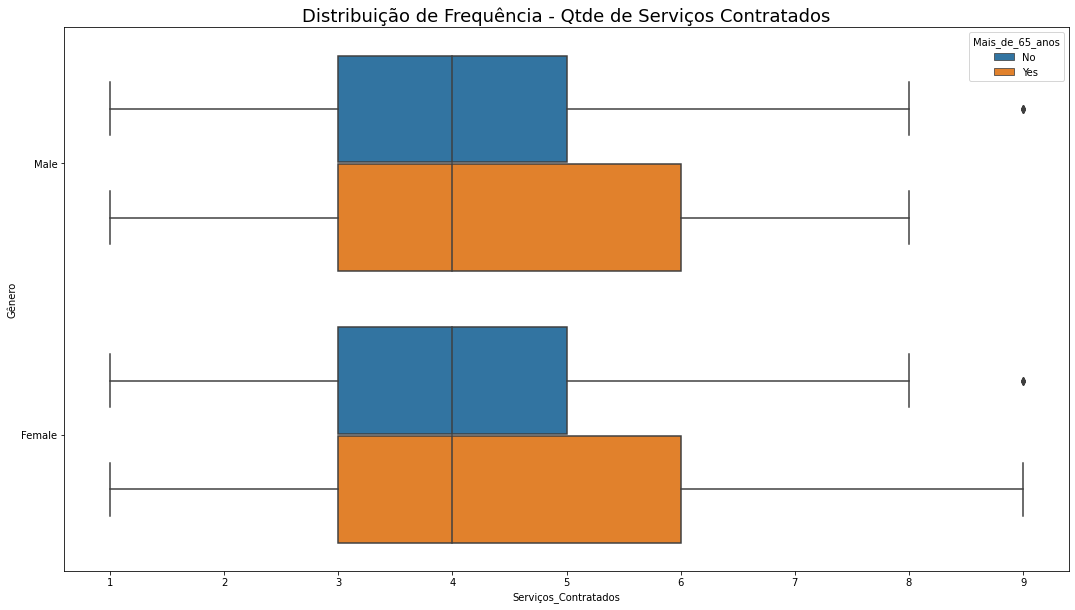

In [129]:
ax = sns.boxplot(x = 'Serviços_Contratados', y = 'Gênero', hue = 'Mais_de_65_anos', data = df_grupo_status.get_group('Yes'))
ax.figure.set_size_inches(18,10)
ax.set_title('Distribuição de Frequência - Qtde de Serviços Contratados', fontsize = 18)
ax

<font color=yellow>Observação: As pessoa idosas tendem a contratar mais serviços. De modo geral podemos assumir que no gráfico acima a distribuição entre homens e mulheres é igual.<font>

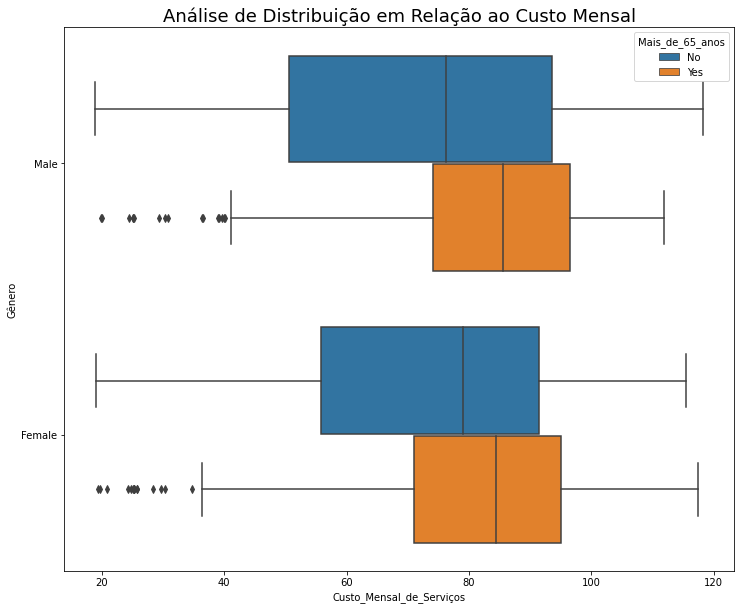

In [130]:
bx = sns.boxplot(x = 'Custo_Mensal_de_Serviços', y = 'Gênero', hue = 'Mais_de_65_anos', data = df_grupo_status.get_group('Yes'))
bx.figure.set_size_inches(12,10)
bx.set_title('Análise de Distribuição em Relação ao Custo Mensal', fontsize = 18)
bx

<font color=yellow>Observação: Seguindo a observação anterior, faz sentido que a mediana aqui, dos idosos, seja um pouco maior do que das outras idades. Vejo também que há uma pequena diferença nos gastos mensais entre homens e mulheres<font>

In [131]:
df_grupo_status.get_group('Yes')['Custo_Mensal_de_Serviços'].describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: Custo_Mensal_de_Serviços, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


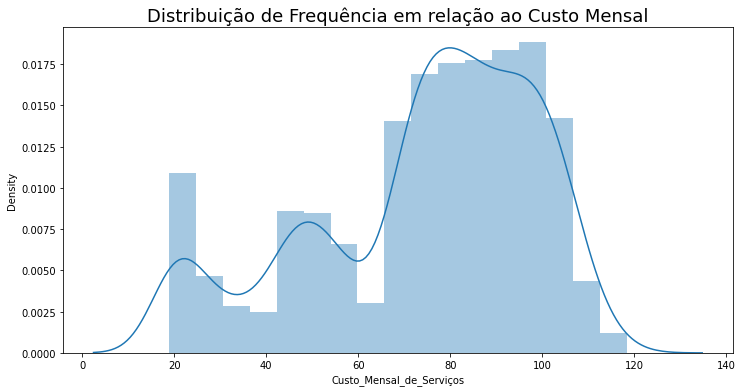

In [132]:
cx = sns.distplot(df_grupo_status.get_group('Yes')['Custo_Mensal_de_Serviços'])
cx.figure.set_size_inches(12, 6)
cx.set_title('Distribuição de Frequência em relação ao Custo Mensal', fontsize = 18)
cx

# Observando a linha de densidade do gráfico observamos uma tendência de uma Assimetria à Esquerda

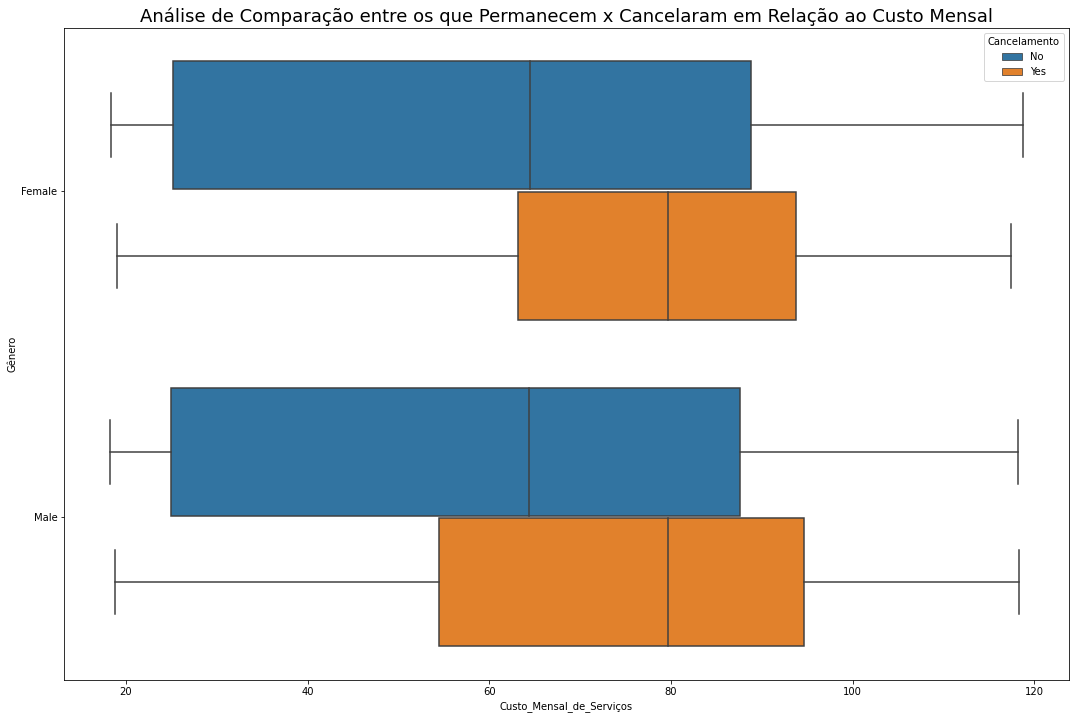

In [133]:
dx = sns.boxplot(x = 'Custo_Mensal_de_Serviços', y = 'Gênero', hue = 'Cancelamento', data = df_corrigido)
dx.figure.set_size_inches(18, 12)
dx.set_title('Análise de Comparação entre os que Permanecem x Cancelaram em Relação ao Custo Mensal', fontsize = 18)
dx

<font color=yellow>Observação: Fica claro que as pessoas que cancelaram tinham um custo médio mensal maior do que as que permaneceram.<font>

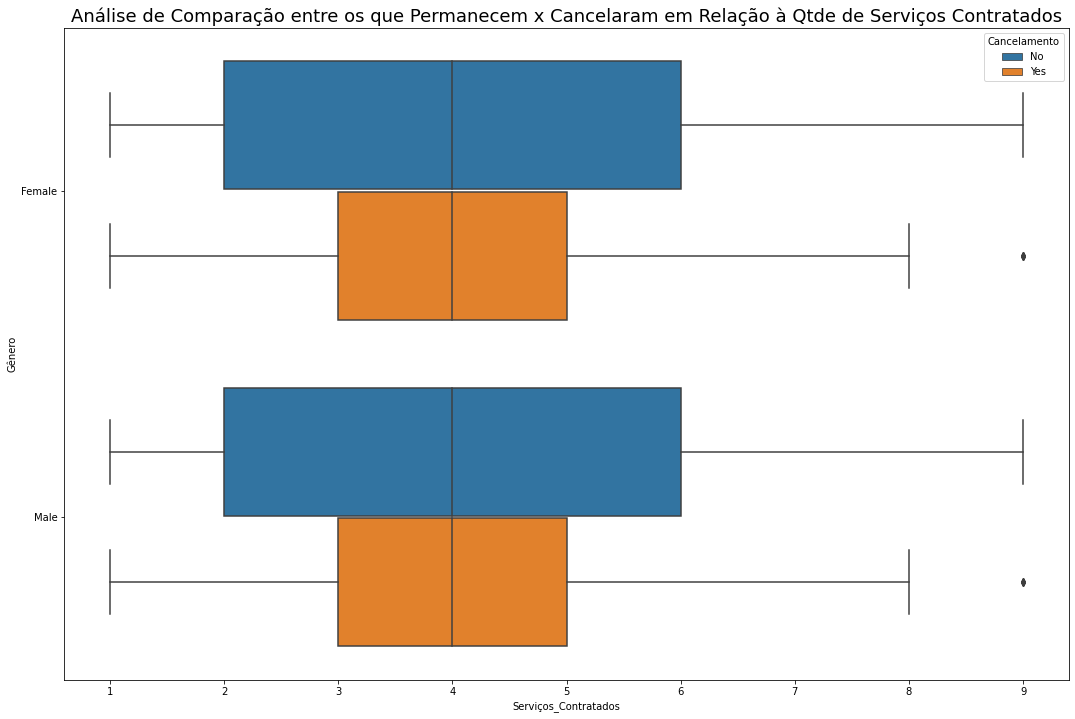

In [134]:
ex = sns.boxplot(x = 'Serviços_Contratados', y = 'Gênero', hue = 'Cancelamento', data = df_corrigido)
ex.figure.set_size_inches(18, 12)
ex.set_title('Análise de Comparação entre os que Permanecem x Cancelaram em Relação à Qtde de Serviços Contratados', fontsize = 18)
ex

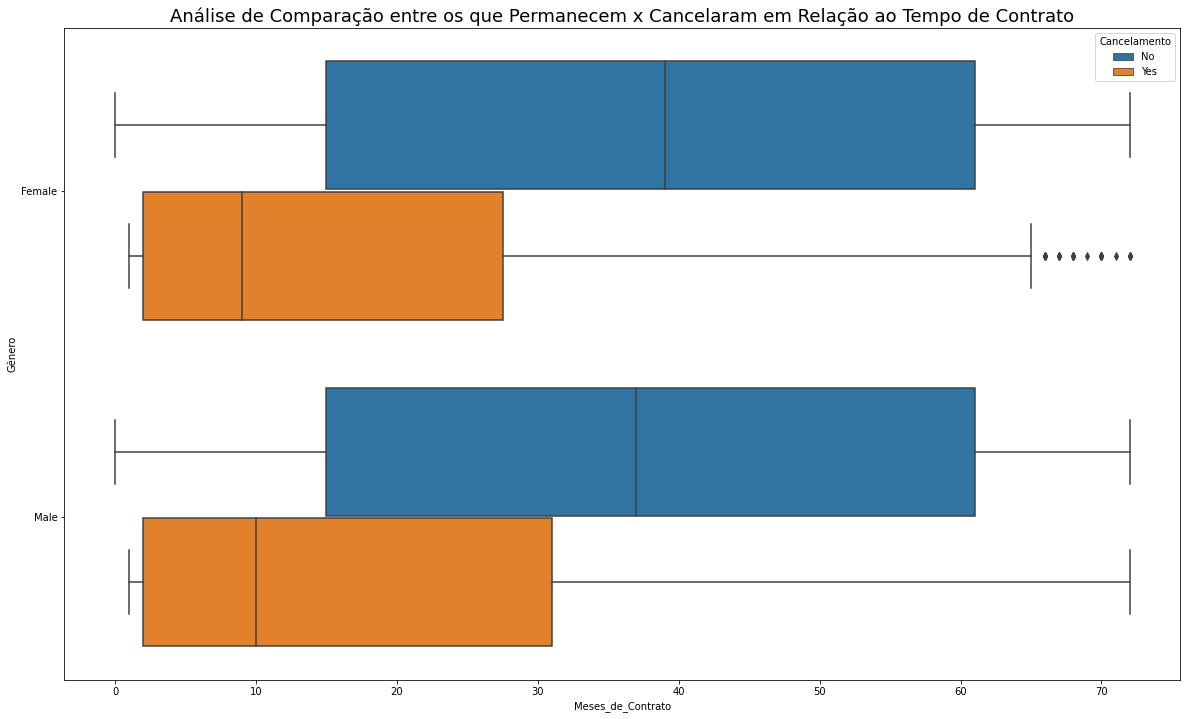

In [135]:
fx = sns.boxplot(x = 'Meses_de_Contrato', y = 'Gênero', hue = 'Cancelamento', data = df_corrigido)
fx.figure.set_size_inches(20, 12)
fx.set_title('Análise de Comparação entre os que Permanecem x Cancelaram em Relação ao Tempo de Contrato', fontsize = 18)
fx

<font color=yellow>Observação: Fica claro que as pessoas que cancelaram tem um tempo médio de contrato bem menor do que as que permaneceram.<font>

In [136]:
tabela_tempo_contrato = pd.crosstab(df_corrigido['Cancelamento'], df_corrigido['Gênero'], values = df_corrigido['Meses_de_Contrato'], aggfunc={'min', 'mean', 'median', 'max', 'std'})
tabela_tempo_contrato

max             mean            median          min       \
Gênero       Female  Male     Female       Male Female  Male Female Male   
Cancelamento                                                               
No             72.0  72.0  37.858768  37.289524   39.0  37.0    0.0  0.0   
Yes            72.0  72.0  17.004260  18.963441    9.0  10.0    1.0  1.0   

                    std             
Gênero           Female       Male  
Cancelamento                        
No            23.989002  24.235600  
Yes           18.529352  20.455859

<font color=yellow>Observação: Na tabela podemos analisar algumas medidas separatrizes sobre o tempo de contrato, podendo comparar os que permanecem com os que cancelaram .<font>

##<font color=green>Analise e Comparação de quais são os serviços mais contratados entre cada grupo.<font>

In [137]:
nome_colunas

['Serviço_Telefônico',
 'Multiplas_Linhas',
 'Serviço_de_Internet',
 'Segurança_Online',
 'Serviço_Backup_Online',
 'Proteção_de_Dispositivo',
 'Suporte_Técnico',
 'Assina_TV',
 'Assina_Filmes']

In [138]:
def mescla (D1, D2):
    unido = {**D1, **D2}
    return unido

lista_status = ['Yes', 'No']

dicio_soma_1 = {}
dicio_soma_2 = {}

for status in lista_status:
  for x in nome_colunas:    # Para cada string na lista 'nome_colunas' fará o que está abaixo:
    n = 0
    dicio_0 = {}
    for y in df_grupo_status.get_group(status)[x]: # Para cada linha da coluna x (item da lista 'nome_colunas'), faz a comparação abaixo e adiciona 1 ou 0 em 'lista'.
      if (y != 'No') & (y != 'No internet service') & (y != 'No phone service'):
        n +=1

    dicio_0 = {x : n}
      
    if status == 'Yes':
      dicio_soma_1 =  (mescla(dicio_soma_1, dicio_0))  # A função mescla faz a soma dos elementos de 'lista_soma' e 'lista' através de uma função lambda como parâmetro
    else:
      dicio_soma_2 =  (mescla(dicio_soma_2, dicio_0))

In [139]:
# Transformando os dicionários criados acima em dataframes
dicio_soma_1 = pd.DataFrame(dicio_soma_1, index = [0]).rename(index = {0:'Cancelou'})
dicio_soma_2 = pd.DataFrame(dicio_soma_2, index = [0]).rename(index = {0:'Permanece'})

# Concatenando os dicionários em um novo dataframe
tabela_qtde_serviços = pd.concat([dicio_soma_1, dicio_soma_2])

In [140]:
tabela_qtde_serviços

,Serviço_Telefônico,Multiplas_Linhas,Serviço_de_Internet,Segurança_Online,Serviço_Backup_Online,Proteção_de_Dispositivo,Suporte_Técnico,Assina_TV,Assina_Filmes
Cancelou,1699,850,1756,295,523,545,310,814,818
Permanece,4662,2121,3761,1724,1906,1877,1734,1893,1914


In [141]:
# Transpondo o dataframe, de modo que as colunas virem linhas e as linhas colunas
tabela_qtde_serviços = tabela_qtde_serviços.T.reset_index()

In [142]:
# Mudando o nome da coluna 'index' para 'Serviços'
tabela_qtde_serviços.rename(columns = {'index':'Serviços'}, inplace = True)

In [143]:
tabela_qtde_serviços

,Serviços,Cancelou,Permanece
0,Serviço_Telefônico,1699,4662
1,Multiplas_Linhas,850,2121
2,Serviço_de_Internet,1756,3761
3,Segurança_Online,295,1724
4,Serviço_Backup_Online,523,1906
5,Proteção_de_Dispositivo,545,1877
6,Suporte_Técnico,310,1734
7,Assina_TV,814,1893
8,Assina_Filmes,818,1914


In [144]:
# Criando nova coluna com a porcentagem de cancelamentos para cada serviço
tabela_qtde_serviços['% Cancelamento'] = (tabela_qtde_serviços.Cancelou / (tabela_qtde_serviços.Cancelou + tabela_qtde_serviços.Permanece))*100

In [145]:
tabela_qtde_serviços.round(2)

,Serviços,Cancelou,Permanece,% Cancelamento
0,Serviço_Telefônico,1699,4662,26.71
1,Multiplas_Linhas,850,2121,28.61
2,Serviço_de_Internet,1756,3761,31.83
3,Segurança_Online,295,1724,14.61
4,Serviço_Backup_Online,523,1906,21.53
5,Proteção_de_Dispositivo,545,1877,22.50
6,Suporte_Técnico,310,1734,15.17
7,Assina_TV,814,1893,30.07
8,Assina_Filmes,818,1914,29.94


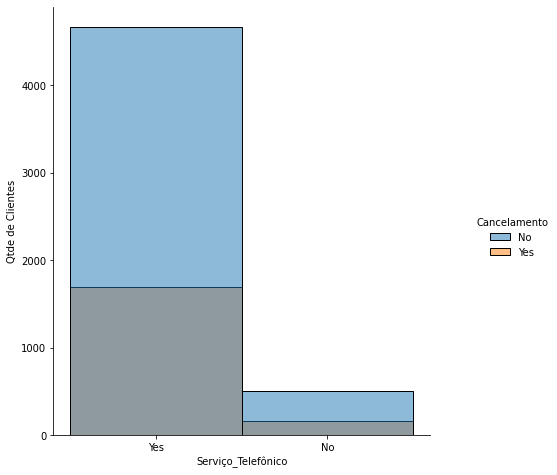

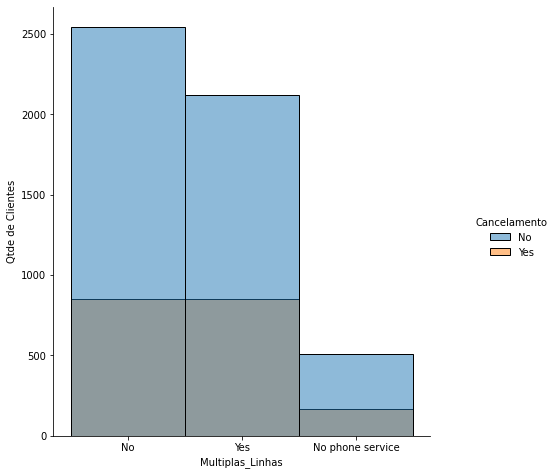

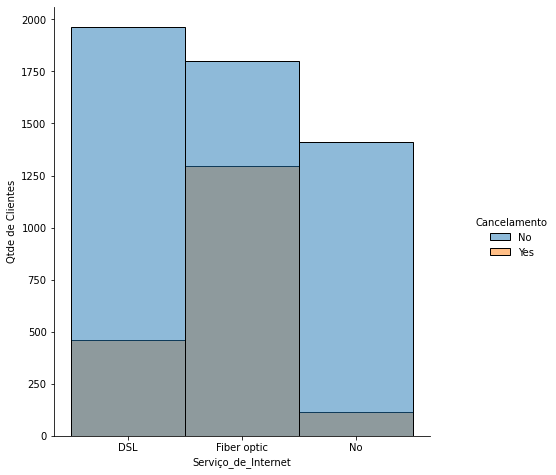

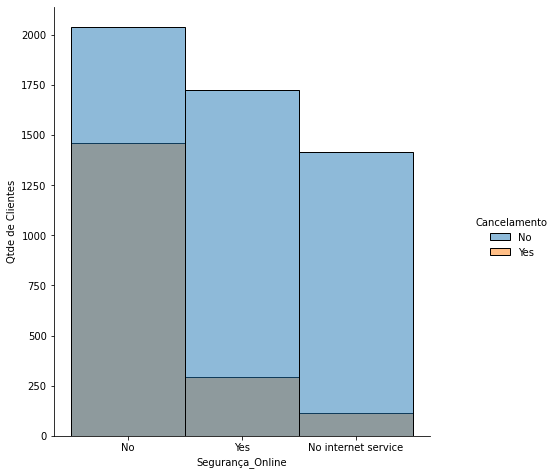

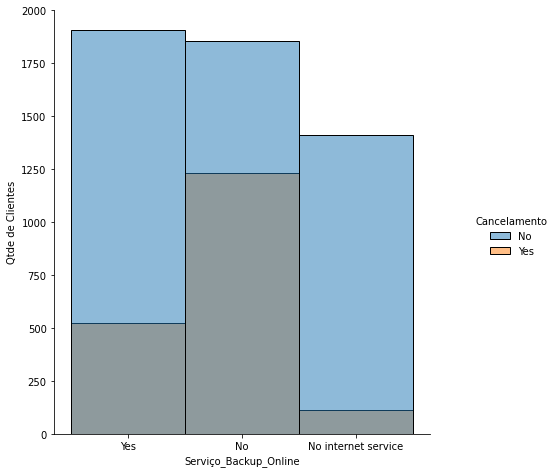

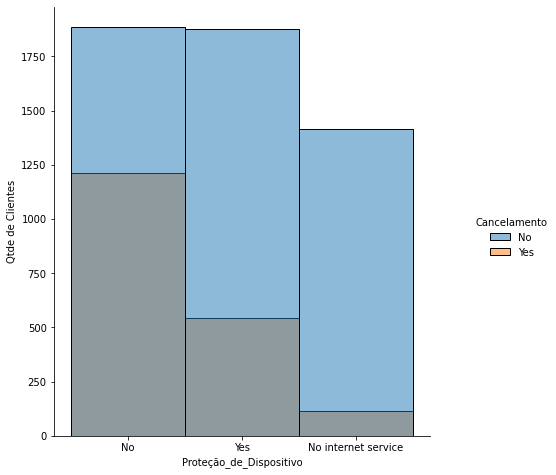

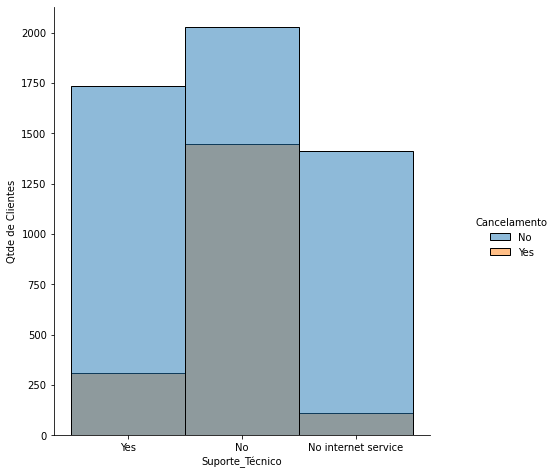

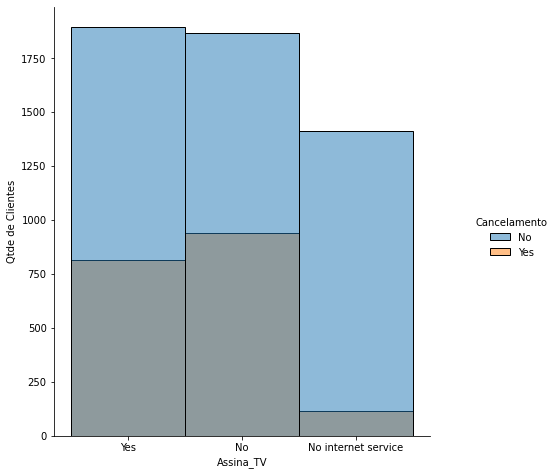

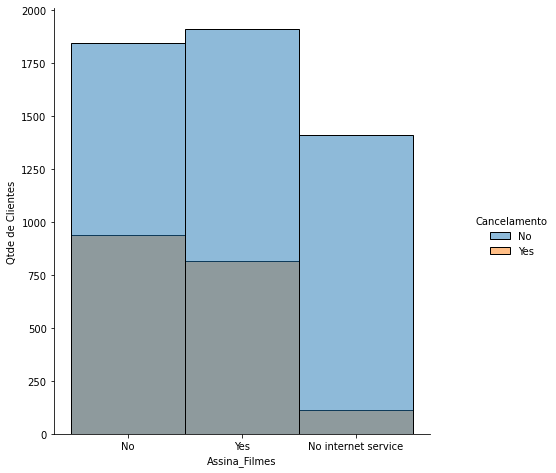

In [146]:
# Para cada coluna de serviço disponível vamos gerar um gráfico comparando a quantidade de pessoas que aderiram a esse serviço e, também, comparar entre os grupos dos Cancelaram e Permaneceram
for x in nome_colunas:
  ax = sns.displot(x = df_corrigido[x], hue = df_corrigido['Cancelamento'])
  ax.figure.set_size_inches(8,7)
  ax.set_ylabels('Qtde de Clientes', fontsize = 10)